In [28]:
from collections import Counter
import calendar
import datetime
import emoji
import os
import re
import regex
import numpy as np
import pandas as pd
from PIL import Image
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter, ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
def isAuthor(s):
    s=s.split(":")
    if len(s) >= 2:
        return True
    else:
        return False
def import_data(file, path='.'):

    df = pd.DataFrame(columns = ["Date", "Time", "Author", "Message"])
    lists = [[] for _ in range(4)]
    senders = []
    try:
        with open(path+"/"+file, encoding = 'utf-8') as f:
            texts = f.readlines()
            for i, message in enumerate(texts):
                if re.search(r"[\d]{1,2}/[\d]{1,2}/[\d]{2}, [\d]{1,2}:[\d]{1,2} ", message):
                    date_time, sender_message = message.split("-")[0].strip(),' '.join(message.split("-")[1:])
                    date, time = date_time[:8].strip(), date_time[date_time.index(",")+2:].strip()
                    if isAuthor(sender_message):
                        sender, chat_message = sender_message[:sender_message.index(":")].strip(), sender_message[sender_message.index(":")+2:].strip()
                        if sender not in senders:
                            senders.append(sender)
                    else:
                        sender, chat_message = None, sender_message.strip()

                    lists[0].append(date)
                    lists[1].append(time)
                    lists[2].append(sender)
                    lists[3].append(chat_message)
                else:
                    lists[3][-1] += ' '+ message

    except Exception as e:
        print(e)

    for k, col in enumerate(df.columns):
        df[col] = lists[k]

    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df = df.dropna()
    return df

In [3]:
df = import_data('WhatsApp Chat with Guys plus Avi.txt')

In [4]:
df

Date     Time           Author  \
0     2019-09-20  8:05 pm      Gaurav (Kj)   
1     2019-09-20  8:07 pm    Avi Jain (Kj)   
2     2019-09-20  8:07 pm    Avi Jain (Kj)   
3     2019-09-20  8:07 pm    Avi Jain (Kj)   
4     2019-09-20  8:07 pm    Avi Jain (Kj)   
...          ...      ...              ...   
39994 2020-08-30  8:46 pm            Mihir   
39995 2020-08-30  8:46 pm  Arghyadeep (Kj)   
39996 2020-08-30  8:50 pm     Gaurang (Kj)   
39997 2020-08-30  8:50 pm     Gaurang (Kj)   
39998 2020-08-30  8:50 pm  Arghyadeep (Kj)   

                                                 Message  
0                                                     Gg  
1                               This message was deleted  
2                               This message was deleted  
3                               This message was deleted  
4                               This message was deleted  
...                                                  ...  
39994                                                Yes  
39995                                                haa  
39996  CSM   able baker tomo Dwm - exp 1(tomo), exp2(...  
39997                                           Bas na ?  
39998                                                haa  

[39939 rows x 4 columns]

In [5]:
df.to_csv('./chat.csv', index=False)
df = pd.read_csv('./chat.csv')
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39939 entries, 0 to 39938
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     39939 non-null  datetime64[ns]
 1   Time     39939 non-null  object        
 2   Author   39939 non-null  object        
 3   Message  39939 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB
None


In [32]:
df.Author.unique()

array(['Gaurav (Kj)', 'Avi Jain (Kj)', 'Gaurang (Kj)', 'Arghyadeep (Kj)',
       'Mihir', 'Nikhil (Kj)', 'Raj Doshi (Kj)', 'Kaustub (Kj)',
       'Deep Dama (Kj)', 'Dhruv Desai (Kj)', 'Ansh Ganatra (Kj)',
       '+91 99300 82755', 'Zenil (Kj)', 'Soham Gadve (Kj)',
       'Abdeali (Kj)', 'Shushant (Kj)', 'Darshan Chheda (Kj)',
       'Deep Doshi (Kj)', 'Rohit Gupta (Kj)', 'Arshan (Kj)',
       'Aditya (Kj)'], dtype=object)

In [7]:
def emoji_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list
df["emoji"] = df.Message.apply(emoji_count)
df.head()

Date     Time         Author                   Message emoji
0 2019-09-20  8:05 pm    Gaurav (Kj)                        Gg    []
1 2019-09-20  8:07 pm  Avi Jain (Kj)  This message was deleted    []
2 2019-09-20  8:07 pm  Avi Jain (Kj)  This message was deleted    []
3 2019-09-20  8:07 pm  Avi Jain (Kj)  This message was deleted    []
4 2019-09-20  8:07 pm  Avi Jain (Kj)  This message was deleted    []

In [8]:
emojis = sum(df['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print("Group Stats: ")
print(f"Total messages: {df.shape[0]}")
print(f"Media: {media_messages}")
print(f"Number of URLs: {links}")
print(f"Number of Emojis: {emojis}")

Group Stats: 
Total messages: 39939
Media: 3419
Number of URLs: 198
Number of Emojis: 21228


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39939 entries, 0 to 39938
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      39939 non-null  datetime64[ns]
 1   Time      39939 non-null  object        
 2   Author    39939 non-null  object        
 3   Message   39939 non-null  object        
 4   emoji     39939 non-null  object        
 5   urlcount  39939 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ MB


In [10]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == "You deleted this message")| (df["Message"] == "This message was deleted")|(df["Message"] == "You deleted this message.")]
media_messages_df = df[(df['Message'] == '<Media omitted>')|(df['Message'] == 'image omitted')|(df['Message'] == 'video omitted')|(df['Message'] == 'sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df

Date     Time           Author  \
0     2019-09-20  8:05 pm      Gaurav (Kj)   
5     2019-09-20  8:08 pm    Avi Jain (Kj)   
6     2019-09-20  8:08 pm    Avi Jain (Kj)   
7     2019-09-20  8:08 pm    Avi Jain (Kj)   
8     2019-09-20  8:08 pm    Avi Jain (Kj)   
...          ...      ...              ...   
39934 2020-08-30  8:46 pm            Mihir   
39935 2020-08-30  8:46 pm  Arghyadeep (Kj)   
39936 2020-08-30  8:50 pm     Gaurang (Kj)   
39937 2020-08-30  8:50 pm     Gaurang (Kj)   
39938 2020-08-30  8:50 pm  Arghyadeep (Kj)   

                                                 Message emoji  urlcount  
0                                                     Gg    []         0  
5                                                   Agar    []         0  
6                                              Arden mei    []         0  
7                                                ^1 hoga    []         0  
8                                Toh skip Kar sakte hai?    []         0  
...                                                  ...   ...       ...  
39934                                                Yes    []         0  
39935                                                haa    []         0  
39936  CSM   able baker tomo Dwm - exp 1(tomo), exp2(...    []         0  
39937                                           Bas na ?    []         0  
39938                                                haa    []         0  

[35841 rows x 6 columns]

In [11]:
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(re.findall(r'\w+', s)))
messages_df.head(10)

Date     Time         Author                    Message emoji  \
0  2019-09-20  8:05 pm    Gaurav (Kj)                         Gg    []   
5  2019-09-20  8:08 pm  Avi Jain (Kj)                       Agar    []   
6  2019-09-20  8:08 pm  Avi Jain (Kj)                  Arden mei    []   
7  2019-09-20  8:08 pm  Avi Jain (Kj)                    ^1 hoga    []   
8  2019-09-20  8:08 pm  Avi Jain (Kj)    Toh skip Kar sakte hai?    []   
10 2019-09-20  8:16 pm    Gaurav (Kj)                        Haa    []   
11 2019-09-20  8:16 pm    Gaurav (Kj)  000001 ke liye bhi 1 dega    []   
12 2019-09-20  8:16 pm   Gaurang (Kj)                    Ha wahi    []   
13 2019-09-20  8:17 pm    Gaurav (Kj)      At least hona chahiye    []   
14 2019-09-20  8:17 pm    Gaurav (Kj)      Fir bhi galat hi hoga    []   

    urlcount  Word_Count  
0          0           1  
5          0           1  
6          0           2  
7          0           2  
8          0           5  
10         0           1  
11         0           6  
12         0           2  
13         0           4  
14         0           5

In [12]:
authors = messages_df.Author.unique()
for i in range(len(authors)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == authors[i]]
    # req_df will contain messages of only one particular user
    print(f'Stats of {authors[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == authors[i]].shape[0]
    print('Media Messages Sent', media)
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    #links consist of total links
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)   
    print()

Stats of Gaurav (Kj) -
Messages Sent 6013
Words per message 4.466655579577582
Media Messages Sent 857
Emojis Sent 3362
Links Sent 22

Stats of Avi Jain (Kj) -
Messages Sent 595
Words per message 3.1714285714285713
Media Messages Sent 66
Emojis Sent 398
Links Sent 0

Stats of Gaurang (Kj) -
Messages Sent 2810
Words per message 3.0896797153024913
Media Messages Sent 306
Emojis Sent 2503
Links Sent 5

Stats of Arghyadeep (Kj) -
Messages Sent 8316
Words per message 6.703823953823954
Media Messages Sent 686
Emojis Sent 4721
Links Sent 100

Stats of Mihir -
Messages Sent 2907
Words per message 4.704162366701066
Media Messages Sent 272
Emojis Sent 1852
Links Sent 13

Stats of Raj Doshi (Kj) -
Messages Sent 474
Words per message 4.738396624472574
Media Messages Sent 16
Emojis Sent 245
Links Sent 1

Stats of Nikhil (Kj) -
Messages Sent 2127
Words per message 4.7320169252468265
Media Messages Sent 174
Emojis Sent 1261
Links Sent 11

Stats of Kaustub (Kj) -
Messages Sent 2076
Words per message 6.

In [13]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(f'Unique Emojis: {total_emojis}')

Unique Emojis: 239


In [14]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

emoji  count
0       😂  15101
1       🤣   1013
2       😆    715
3       🙂    313
4       🙈    290
..    ...    ...
234     💙      1
235    🙌🏼      1
236    🏃🏼      1
237    ⚰️      1
238    🕶️      1

[239 rows x 2 columns]

In [15]:
import plotly.express as px
fig = px.pie(emoji_df[:20], values='count', names='emoji',
             title='Emoji Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [16]:
l = messages_df.Author.unique()
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    total_emojis_list = list([a for b in dummy_df.emoji for a in b])
    emoji_dict = dict(Counter(total_emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    print('Emoji Distribution for', l[i])
    author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
    fig = px.pie(author_emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

Emoji Distribution for Gaurav (Kj)


Emoji Distribution for Avi Jain (Kj)


Emoji Distribution for Gaurang (Kj)


Emoji Distribution for Arghyadeep (Kj)


Emoji Distribution for Mihir


Emoji Distribution for Raj Doshi (Kj)


Emoji Distribution for Nikhil (Kj)


Emoji Distribution for Kaustub (Kj)


Emoji Distribution for Deep Dama (Kj)


Emoji Distribution for Dhruv Desai (Kj)


Emoji Distribution for Ansh Ganatra (Kj)


Emoji Distribution for +91 99300 82755


Emoji Distribution for Zenil (Kj)


Emoji Distribution for Soham Gadve (Kj)


Emoji Distribution for Abdeali (Kj)


Emoji Distribution for Darshan Chheda (Kj)


Emoji Distribution for Deep Doshi (Kj)


Emoji Distribution for Rohit Gupta (Kj)


Emoji Distribution for Shushant (Kj)


Emoji Distribution for Arshan (Kj)


Emoji Distribution for Aditya (Kj)


In [17]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 1035341 words in all the messages.


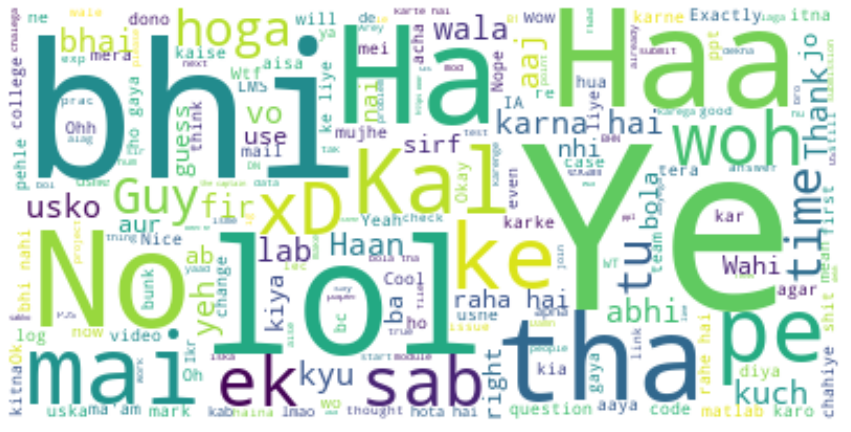

In [18]:
stopwords = set(STOPWORDS)
stopwords.update(["kya", "Haa", "ko", "ye", "Ye", "se", "hai", "thi", "ka", "ha", "na", "toh", "hi", "mein", "no", "yes", "nahi", "koi", "ki"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Gaurav (Kj)


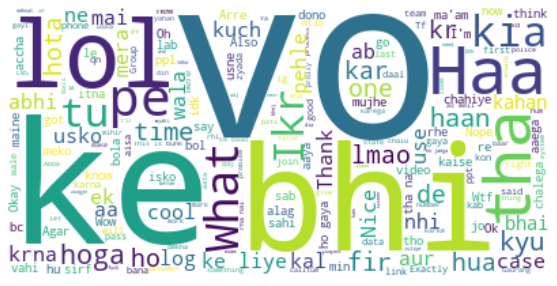

Author name Avi Jain (Kj)


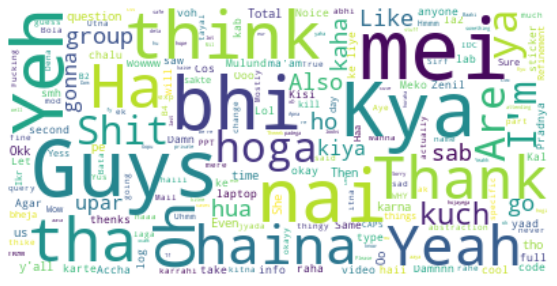

Author name Gaurang (Kj)


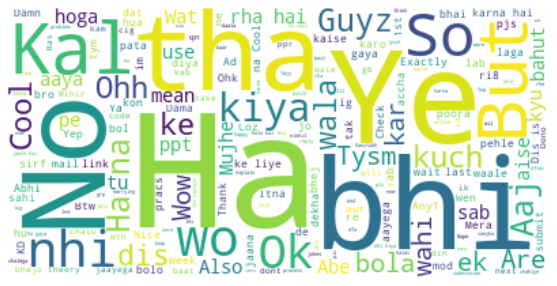

Author name Arghyadeep (Kj)


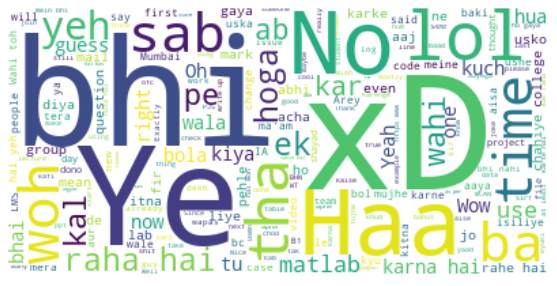

Author name Mihir


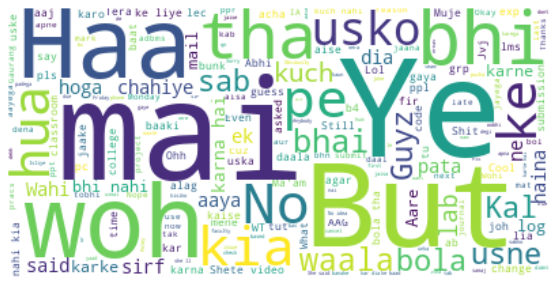

Author name Raj Doshi (Kj)


Author name Nikhil (Kj)


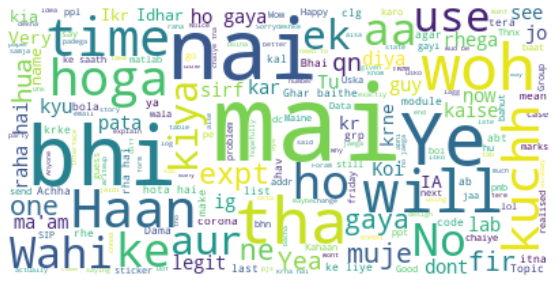

Author name Kaustub (Kj)


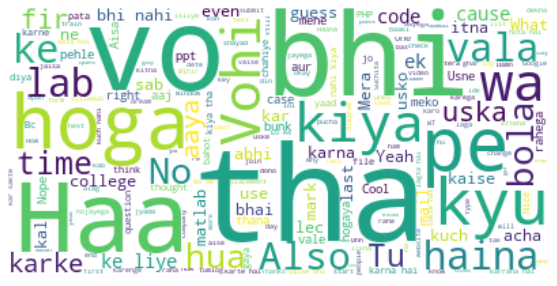

Author name Deep Dama (Kj)


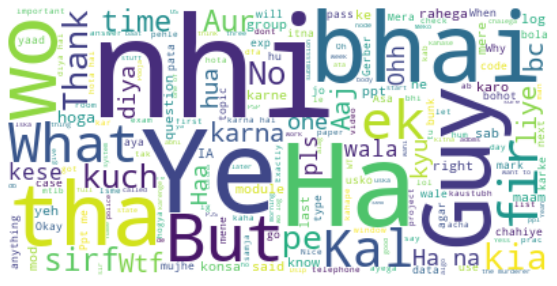

Author name Dhruv Desai (Kj)


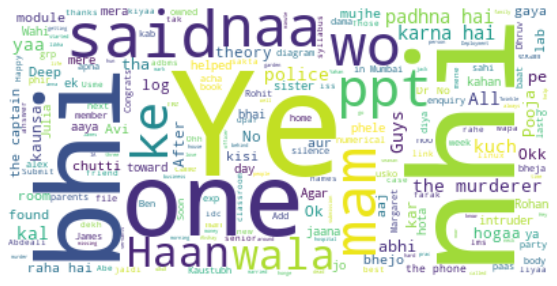

Author name Ansh Ganatra (Kj)


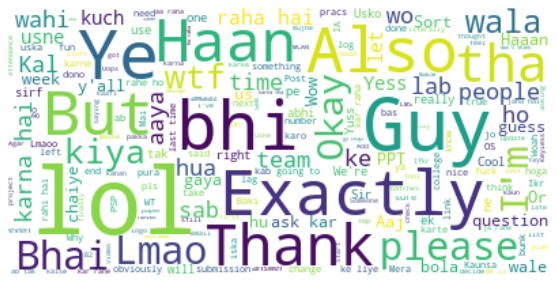

Author name +91 99300 82755


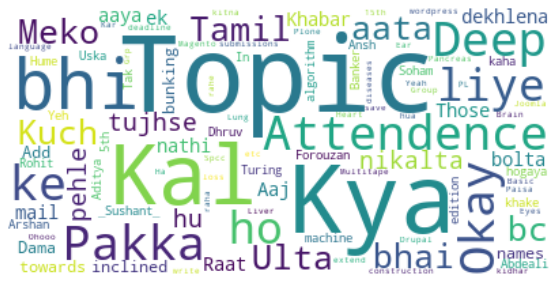

Author name Zenil (Kj)


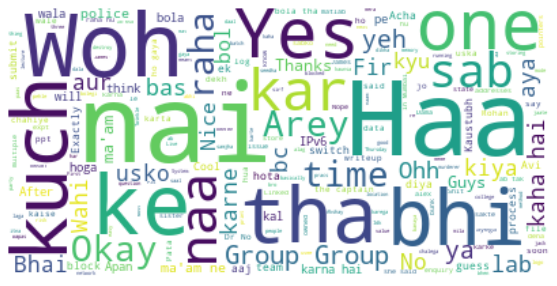

Author name Soham Gadve (Kj)


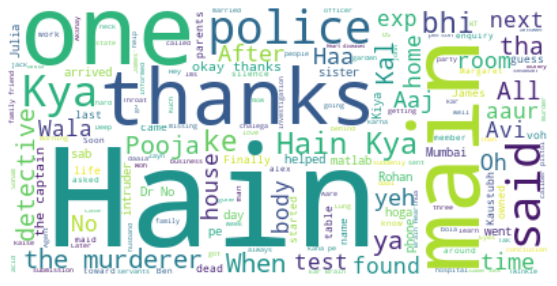

Author name Abdeali (Kj)


Author name Darshan Chheda (Kj)


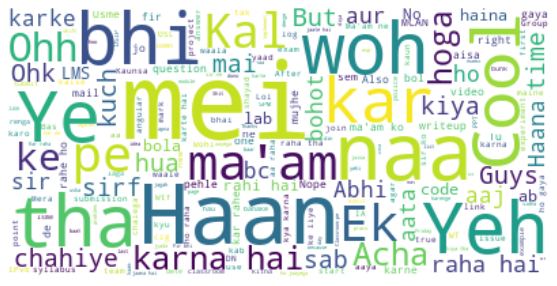

Author name Deep Doshi (Kj)


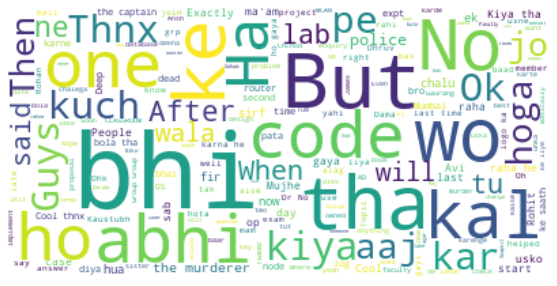

Author name Rohit Gupta (Kj)


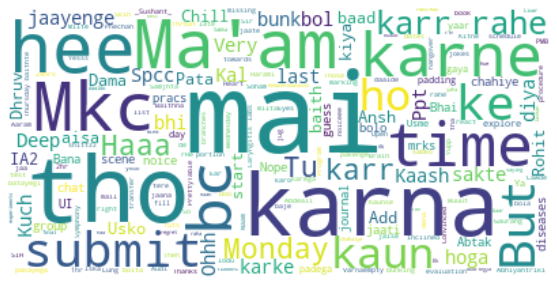

Author name Shushant (Kj)


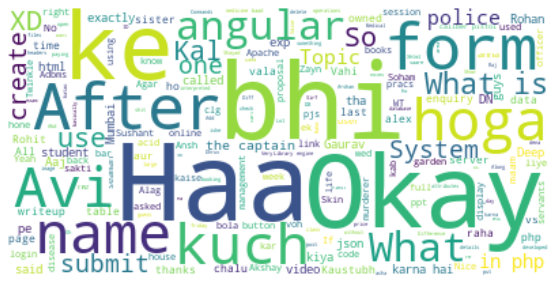

Author name Arshan (Kj)


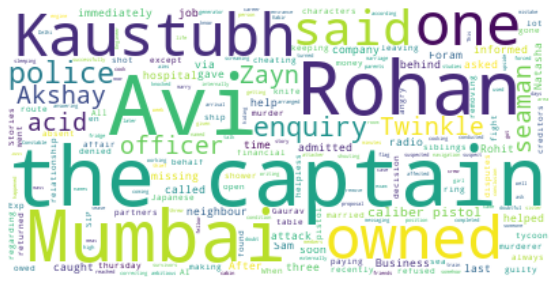

Author name Aditya (Kj)


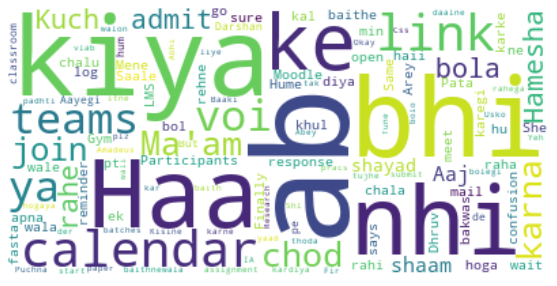

In [19]:
l = messages_df.Author.unique()
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    stopwords.update(["kya", "Haa", "ko", "ye", "Ye", "se", "hai", "thi", "ka", "ha", "na", "toh", "hi", "mein", "no", "yes", "nahi", "koi", "ki"])
    # Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    # Display the generated image:
    # the matplotlib way:

    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [20]:
messages_df["MessageCount"] = 1
messages_df.tail()
print(df.info())
print(len(df.Date.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39939 entries, 0 to 39938
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      39939 non-null  datetime64[ns]
 1   Time      39939 non-null  object        
 2   Author    39939 non-null  object        
 3   Message   39939 non-null  object        
 4   emoji     39939 non-null  object        
 5   urlcount  39939 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ MB
None
315


In [49]:
date_df = messages_df.groupby(messages_df['Date']).sum()
print(date_df)
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount", title='Number of Messages as time moves on.')
fig.update_xaxes(nticks=20)
fig.show()

<class 'int'>
<class 'int'>


Text(0, 0.5, 'Date')

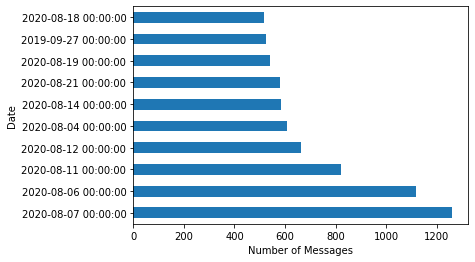

In [22]:
messages_df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [23]:
def dayofweek(i):
    l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,8000]
    )),
  showlegend=True
)
fig.show()

Text(0, 0.5, 'Time')

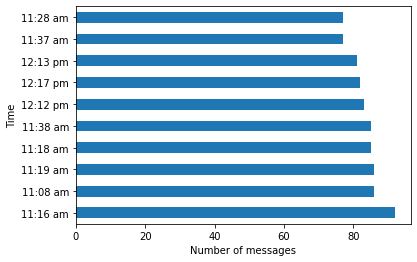

In [24]:
messages_df['Time'].value_counts().head(10).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [25]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35841 entries, 0 to 39938
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          35841 non-null  datetime64[ns]
 1   Time          35841 non-null  object        
 2   Author        35841 non-null  object        
 3   Message       35841 non-null  object        
 4   emoji         35841 non-null  object        
 5   urlcount      35841 non-null  int64         
 6   Word_Count    35841 non-null  int64         
 7   MessageCount  35841 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 2.5+ MB


In [39]:
import math
(int(math.ceil(messages_df.urlcount.max().item()/10))*10)

10

In [26]:
from matplotlib.colors import ColorConverter, ListedColormap
def calendar_plot(data, year=None, how='count', column = 'MessageCount', savefig=False, dpi=100):
    """ Adjusted calendar plot from https://pythonhosted.org/calmap/
    
    Copyright (c) 2015 by Martijn Vermaat
    
    
    To do:
    * year set to None and find the minimum year
    * Choose column instead of using index
    * Set date as index
    
    Parameters:
    -----------
    year : boolean, default None
    how : string, default 'count'
        Which methods to group by the values. 
        Note, it is always by day due to the
        nature of a calendar plot. 
    column : string, default 'User'
        The column over which you either count or sum the values
        For example, count activity in a single day.
    savefig : boolean, default False
        Whether or not to save the figure instead of showing.
    dpi : int, default 100
        Resolution of the figure you want to save.
    
    
    """
    
    # Get minimum year if not given
    if year == None:
        year = data.Date.min().year
    
    # Prepare data
    data = data.set_index('Date').loc[:, column]
    
    # Resample data
    if how == 'sum':
        daily = data.resample('D').sum()
    elif how == 'count':
        daily = data.resample('D').count()
    
    vmin = daily.min()
    vmax = daily.max()

    # Fill in missing dates
    daily = daily.reindex(pd.date_range(start=str(year), end=str(year + 1), 
                                        freq='D')[:-1])
    daily = daily.to_frame()
    # Put into dataframe
    # Fill is needed to created the initial raster
    daily['fill'] = 1
    daily['day'] = daily.index.weekday
    daily['week'] = daily.index.week
    

    # Correctly choose week and day
    daily.loc[(daily.index.month == 1) & (daily.week > 50), 'week'] = 0
    daily.loc[(daily.index.month == 12) & (daily.week < 10), 'week'] \
        = daily.week.max() + 1

    # Create data to be plotted
    plot_data = daily.pivot('day', 'week', 'MessageCount').values[::-1]
    plot_data = np.ma.masked_where(np.isnan(plot_data), plot_data)

    # Create data for the background (all days)
    fill_data = daily.pivot('day', 'week', 'fill').values[::-1]
    fill_data = np.ma.masked_where(np.isnan(fill_data), fill_data)

    # Set plotting values
    cmap='OrRd'
    linewidth=1
    linecolor = 'white'
    fillcolor='whitesmoke'

    # Draw heatmap for all days of the year with fill color.
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca()
    ax.pcolormesh(fill_data, vmin=0, vmax=1, cmap=ListedColormap([fillcolor]))
    ax.pcolormesh(plot_data, vmin=vmin, vmax=vmax, cmap=cmap, 
                  linewidth=linewidth, edgecolors=linecolor)

    # Limit heatmap to our data.
    ax.set(xlim=(0, plot_data.shape[1]), ylim=(0, plot_data.shape[0]))

    # # Square cells.
    ax.set_aspect('equal')

    # plt.axis('off')

    # Remove spines and ticks.
    for side in ('top', 'right', 'left', 'bottom'):
        ax.spines[side].set_visible(False)
    ax.xaxis.set_tick_params(which='both', length=0)
    ax.yaxis.set_tick_params(which='both', length=0)

    # Get ticks and labels for days and months
    daylabels = calendar.day_abbr[:]
    dayticks = range(len(daylabels))

    monthlabels = calendar.month_abbr[1:]
    monthticks = range(len(monthlabels))

    # Create label and ticks for x axis
    font = {'fontname':'Comic Sans MS', 'fontsize':20}
    ax.set_xlabel('')
    ax.set_xticks([3+i*4.3 for i in monthticks])
    # ax.set_xticks([daily.loc[datetime.date(year, i + 1, 15),:].week
    #                for i in monthticks])
    ax.set_xticklabels([monthlabels[i] for i in monthticks], ha='center', **font)

    # Create label and ticks for y axis
    font = {'fontname':'Comic Sans MS', 'fontsize':15}
    ax.set_ylabel('')
    ax.yaxis.set_ticks_position('right')
    ax.set_yticks([6 - i + 0.5 for i in dayticks])
    ax.set_yticklabels([daylabels[i] for i in dayticks], rotation='horizontal',
                       va='center', **font)
    
#     ax.set_xlim(0, 54)

    ax.set_ylabel(str(year), fontsize=52,color='#DCDCDC',fontweight='bold',
                  fontname='Comic Sans MS', ha='center')
    if savefig:
        fig.savefig(f'results/calendar_{year}.png', format="PNG", dpi=dpi)
    else:
        plt.show()

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


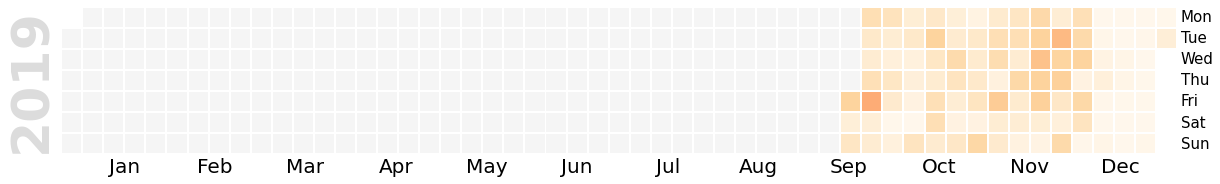

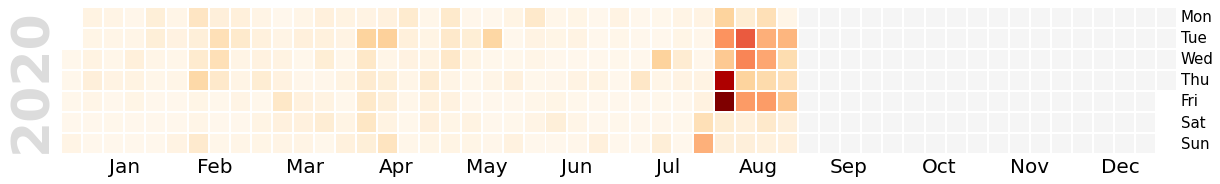

In [29]:
years = set(pd.DatetimeIndex(messages_df.Date.values).year)
for year in years:
    calendar_plot(messages_df, year=year, how='count', column='MessageCount')